In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler

# EDA

In [30]:
data=pd.read_csv("Starbucks_stock_history.csv")
data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1992-06-26,0.270957,0.287086,0.264507,0.277409,224358400,0.0,0.0
1,1992-06-29,0.280635,0.303215,0.274183,0.296763,58732800,0.0,0.0
2,1992-06-30,0.303215,0.306440,0.283860,0.287086,34777600,0.0,0.0
3,1992-07-01,0.290312,0.296763,0.280635,0.293538,18316800,0.0,0.0
4,1992-07-02,0.296763,0.296763,0.287086,0.293538,13996800,0.0,0.0


In [31]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7372 entries, 1992-06-26 to 2021-10-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7372 non-null   float64
 1   High          7372 non-null   float64
 2   Low           7372 non-null   float64
 3   Close         7372 non-null   float64
 4   Volume        7372 non-null   int64  
 5   Dividends     7372 non-null   float64
 6   Stock Splits  7372 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 460.8 KB


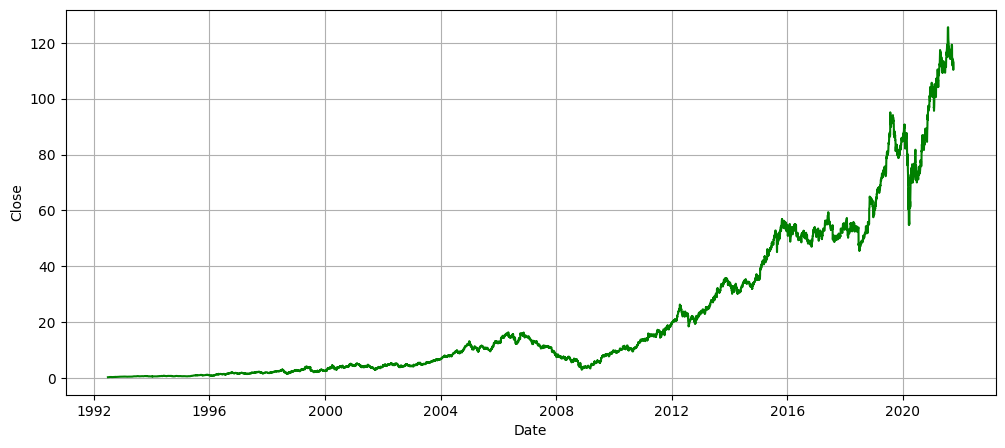

In [33]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Date",y="Close",data=data,color="green")
plt.grid()
plt.show()

<Axes: >

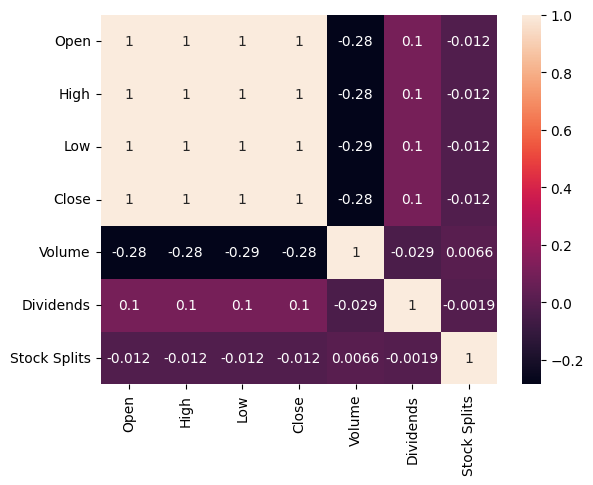

In [53]:
sns.heatmap(data.corr(),annot=True)

# Feature Engineering

In [34]:
df=data[["Close"]].values

In [35]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)

In [36]:
def create_sequence(df,sequence_length):
    x=[]
    y=[]
    for i in range (sequence_length,len(df)):
        x.append(df[i-sequence_length:i,0])
        y.append(df[i,0])
    return np.array(x),np.array(y)

In [37]:
sequence_length=10

In [38]:
x,y=create_sequence(scaler_data,sequence_length)

In [39]:
x=x.reshape((x.shape[0],x.shape[1],1))
print(x.shape,y.shape)

(7362, 10, 1) (7362,)


# LSTM Model

In [40]:
model=Sequential()

In [41]:
model.add(LSTM(50,activation="relu",input_shape=(x.shape[1],x.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(x,y,verbose=1,epochs=100,batch_size=32)

Epoch 1/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0247
Epoch 2/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015
Epoch 3/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
Epoch 4/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 5/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 6/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 7/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 8/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7495e-04
Epoch 9/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 10/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 11/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010
Epoch 12/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 13/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011
Epoch 14/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.6713e-04
Epoch 15/100
231/231 ━━━━━━━━━━━━━━

In [48]:
loss=model.evaluate(x,y)
print("Model Loss",loss)

231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 1.9834e-05
Model Loss 6.863616727059707e-05


In [49]:
predictions=model.predict(x)
predictions=scaler.fit_transform(predictions)
print(predictions[:10])

231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.0000000e+00]
 [2.8474722e-05]
 [4.6201982e-05]
 [8.3594583e-05]
 [1.5807012e-04]
 [2.5083078e-04]
 [3.2412726e-04]
 [3.8625719e-04]
 [4.2507658e-04]
 [4.6895258e-04]]


In [50]:
actual_values=scaler.fit_transform(y.reshape(-1,1))

# Model Evaluation

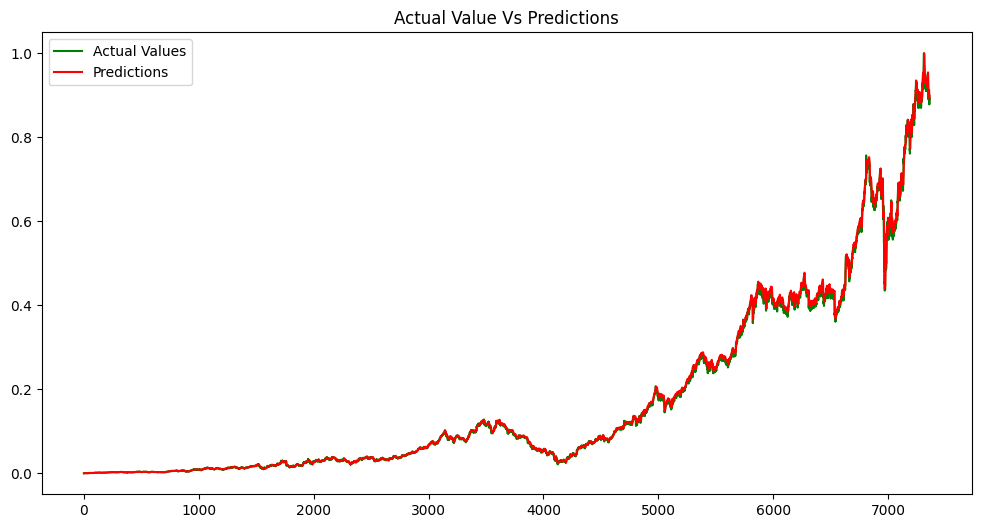

In [51]:
plt.figure(figsize=(12,6))
plt.plot(actual_values,label="Actual Values",color="green")
plt.plot(predictions,label="Predictions",color="red")
plt.legend()
plt.title("Actual Value Vs Predictions")
plt.show()